In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection

iris = pd.read_csv("/home/dvinci/PycharmProjects/ScikitLearnBasics/Basics/utility-noncode/Iris.csv")
print ( iris.columns)
iris.head()

Index([u'Id', u'SepalLengthCm', u'SepalWidthCm', u'PetalLengthCm',
       u'PetalWidthCm', u'Species'],
      dtype='object')


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


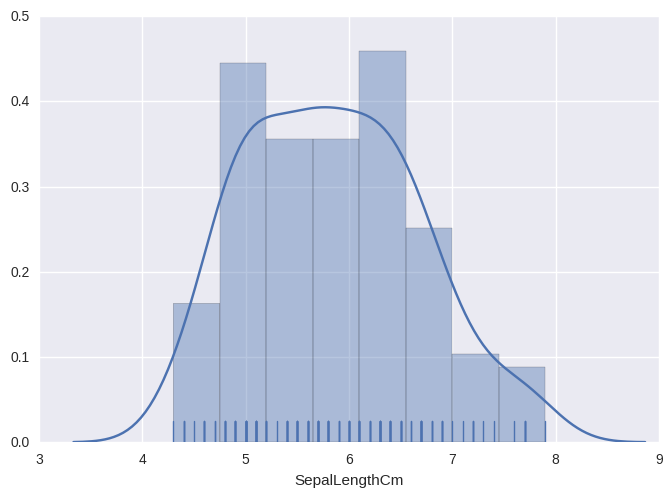

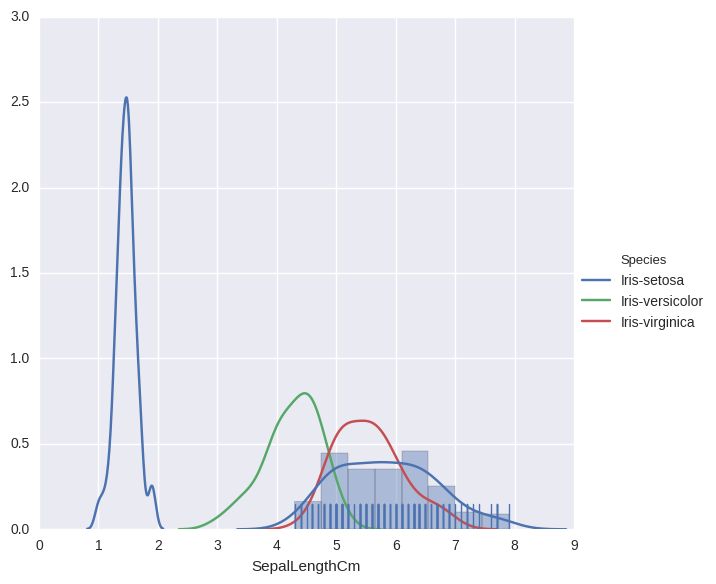

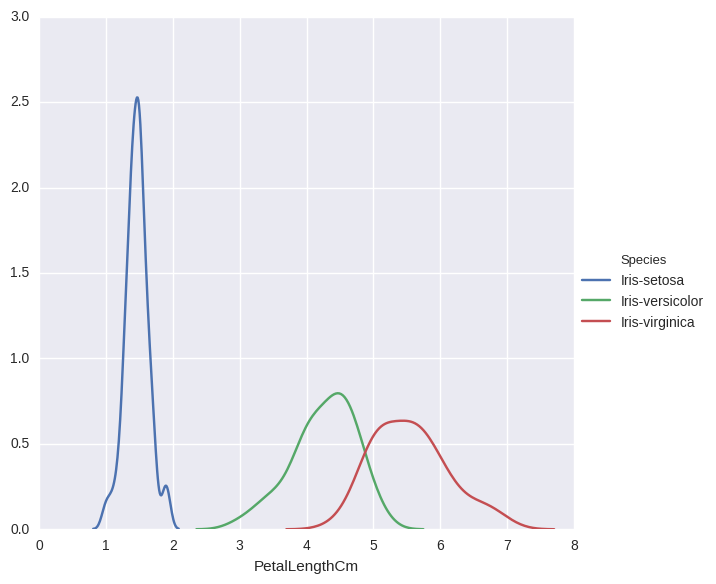

In [9]:
# univariate plots to see individual distribution
sns.distplot(a=iris["SepalLengthCm"],rug=True) #kde=true & hist=true by default

# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
# not univariate in complete sense. 3 different plots for 3 species values
sns.FacetGrid(iris, hue="Species", size=6) \
    .map(sns.kdeplot, "PetalLengthCm") \
    .add_legend()
sns.plt.show()

In [ ]:
# you can see that all below combinations are providing a good distribution of "Species"
sns.factorplot(x="SepalLengthCm",y="SepalWidthCm",data=iris,hue="Species")
sns.factorplot(x="SepalLengthCm",y="PetalLengthCm",data=iris,hue="Species")
sns.factorplot(x="PetalWidthCm",y="SepalWidthCm",data=iris,hue="Species")
sns.factorplot(x="PetalLengthCm",y="PetalWidthCm",data=iris,hue="Species")

# let you easily view both a joint distribution and its marginals at once.
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
# Can't provide hue in joint plot
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris,size=5,kind="scatter") #scatter is default kind
sns.plt.show()

In [ ]:
# A clear picture of distribution can be seen with pairplot. Pairplot displays distribution of data
# according to every combination.
# In pair plot, members except diagonals are joint plot
iris_without_id = iris.drop("Id",axis=1)
print (iris_without_id.columns)
sns.pairplot(iris_without_id,hue="Species",diag_kind="kde")
sns.plt.show()

In [ ]:
# After visualization, let's apply some machine learning analysis
# Iris is supervised classification problem. So will be using algorithms for that

from sklearn import svm, neighbors

# drop id column as it is redundant
iris = iris.drop("Id", axis=1)
svm_classifier = svm.SVC()
# devide the dataset into training and test data

iris_training, iris_test = model_selection.train_test_split(iris, test_size=0.1)
# separate x and y variables from data
iris_training_y = iris_training["Species"]
iris_training_x = iris_training.drop("Species", axis=1)

iris_test_y = iris_test["Species"]
iris_test_x = iris_test.drop("Species", axis=1)

svm_classifier.fit(X=iris_training_x, y=iris_training_y)


def svm_score(iris_test_y, iris_predict_y):
    # convert to numpy array to compare both predict and actual array
    # Iris_test_y contain indexes from dataframe(parent)
    iris_test_y = np.array(iris_test_y)
    count = 0
    total_count = 0
    for idx in range(iris_test_y.shape[0]):
        if (iris_test_y[idx] == iris_predict_y[idx]):
            count += 1
        total_count += 1
    return count / float(total_count)


print ( "SVM score: ", svm_score(iris_test_y, svm_classifier.predict(iris_test_x)) )

# SVM proves as a good classifier

In [ ]:
# KNeighbourClassifier
knn_classifier = neighbors.KNeighborsClassifier()
knn_classifier.fit(X=iris_training_x, y=iris_training_y)
print ( "KNN classifier score: ", knn_classifier.score(iris_test_x, iris_test_y))

# Decision Tree Classifier

from sklearn import tree

tree_classifier = tree.DecisionTreeClassifier()
tree_classifier.fit(X=iris_training_x, y=iris_training_y)
print ( "Decision Tree classifier score: ", tree_classifier.score(iris_test_x, iris_test_y))

Index([u'Id', u'SepalLengthCm', u'SepalWidthCm', u'PetalLengthCm',
       u'PetalWidthCm', u'Species'],
      dtype='object')


Index([u'SepalLengthCm', u'SepalWidthCm', u'PetalLengthCm', u'PetalWidthCm',
       u'Species'],
      dtype='object')


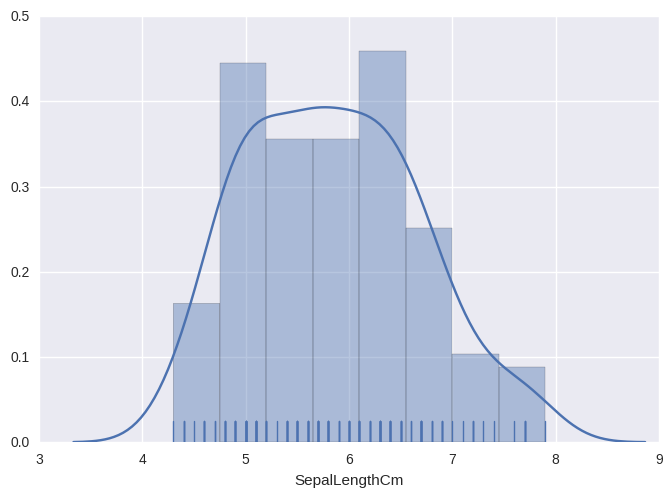

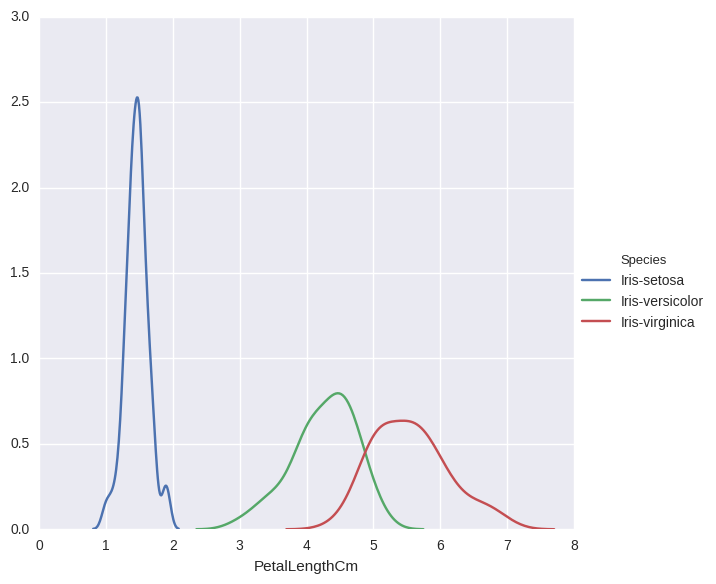

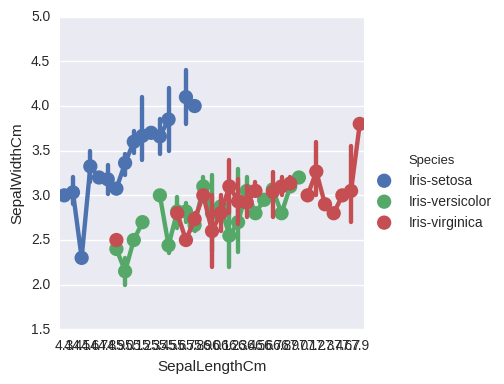

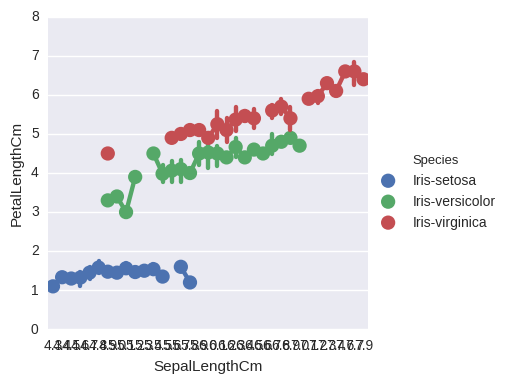

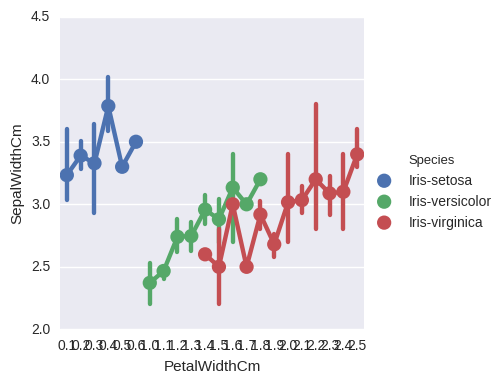

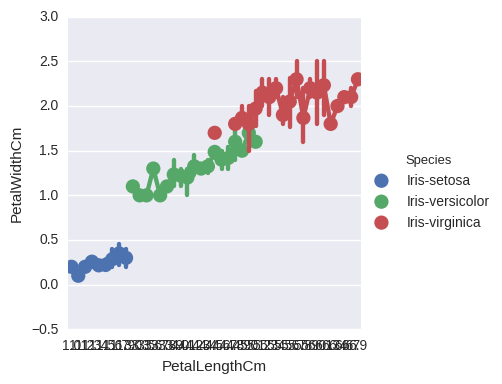

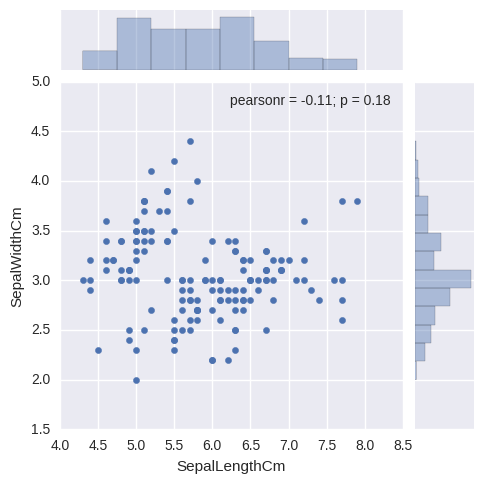

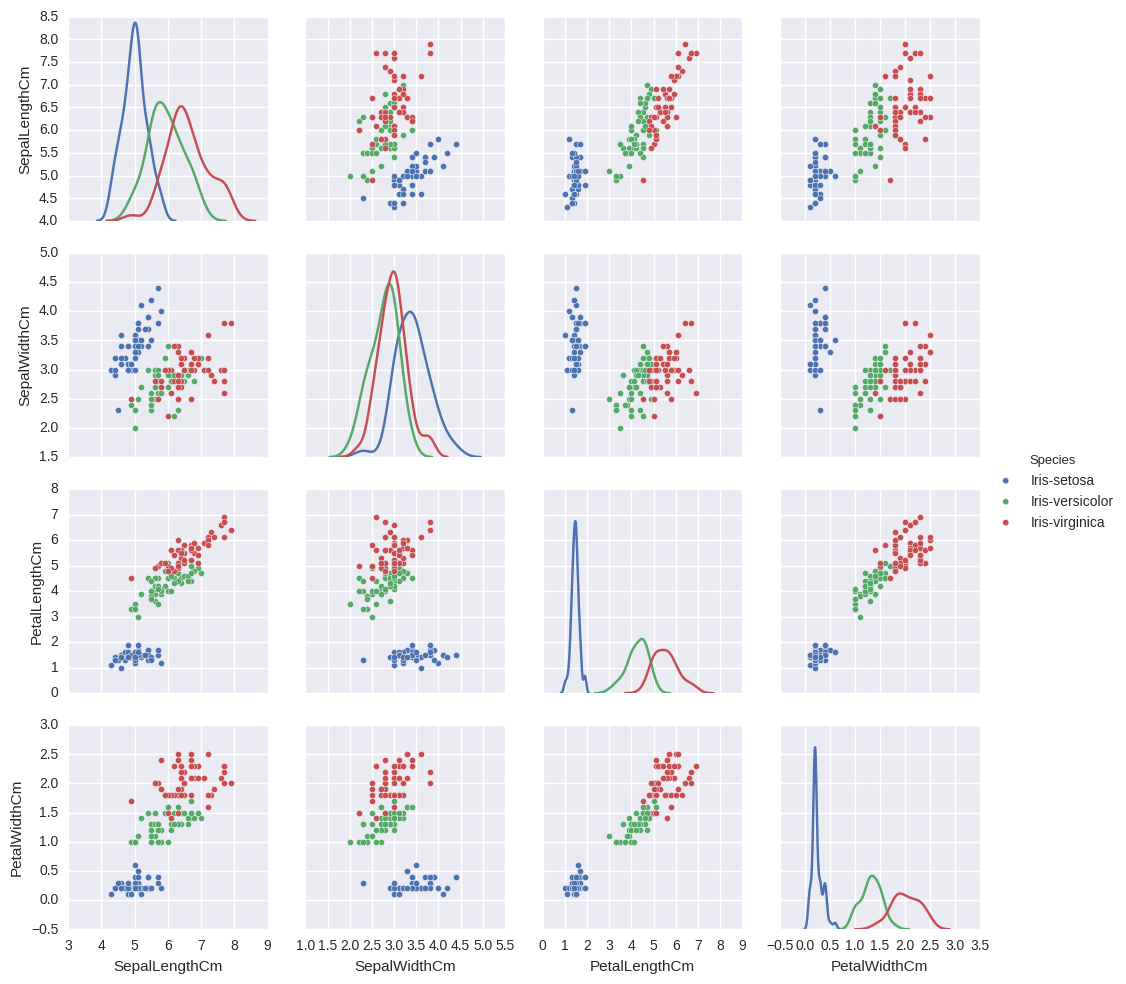

('SVM score: ', 1.0)
('KNN classifier score: ', 0.93333333333333335)
('Decision Tree classifier score: ', 1.0)
(array([ 8, 28, 48, 68, 89]), array([[ 1.        ,  1.        ,  1.        ],
       [ 0.89285714,  1.        ,  1.        ],
       [ 0.89583333,  1.        ,  1.        ],
       [ 0.91176471,  0.98529412,  0.98529412],
       [ 0.97752809,  0.97752809,  1.        ]]), array([[ 0.43478261,  0.6       ,  0.52272727],
       [ 1.        ,  0.91111111,  0.90909091],
       [ 1.        ,  0.91111111,  0.93181818],
       [ 1.        ,  0.91111111,  0.93181818],
       [ 1.        ,  0.95555556,  0.93181818]]))
[ 1.          0.96428571  0.96527778  0.96078431  0.98501873]
[ 0.          0.05050763  0.04910464  0.0346621   0.01059336]


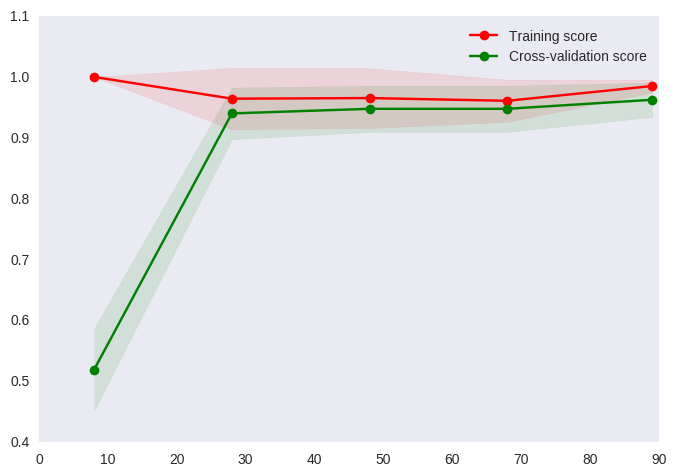

In [6]:
# Now visualize above classifiers using learning and validation curves
from sklearn.model_selection import validation_curve, learning_curve

train_sizes, train_scores, test_scores = learning_curve(svm_classifier, iris_training_x, iris_training_y)
print ( train_sizes,train_scores,test_scores)

train_scores_mean = np.mean(train_scores, axis=1)
print ( train_scores_mean )
train_scores_std = np.std(train_scores, axis=1)
print ( train_scores_std )
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

#matplotlib.pyplot.fill_between(x, y1, y2=0, where=None, interpolate=False, step=None, hold=None, data=None, **kwargs)
#Make filled polygons between two curves.
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

#plot the data just like we plot the data on x-y cordinates
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()